In [1]:
import QuICCPython.read as read
import QuICCPython.cartesian.spectral as cartesian
import numpy as np


from matplotlib import pyplot as plt

# Read physical and spectral data files

In [2]:
geometry = 'cartesian'
S_filename='stateSpectralCartesianQuICC.hdf5' # This should be the path to the spectral coefficient state file
P_filename='statePhysicalCartesianQuICC.hdf5' # This should be the path to the converted (physical space) state file
# The example files have a temperature field = cos(3x)cos(2y)


p = read.PhysicalState(P_filename, geometry)
s = read.SpectralState(S_filename, geometry)

# Reading from physical state

In [3]:
p.fields.dz_meantemperature
p.grid_x
p.parameters.rayleigh

20.0

# Reading from spectral state

In [4]:
print('rayleigh:', s.parameters.rayleigh)
print('streamfunction size:', s.fields.streamfunction.shape)
# Get time stepping information
print('timestep:', s.parameters.timestep)
print('time:', s.parameters.time)

# Grid information
print('N:', s.specRes.N) # Chebsyshev in vertical direction --- (use 3/2*(N+1) to get phys resolution)
print('kx',s.specRes.kx) # wavenumbers in x --- (use 3/2 * (kx+1) to get phys resolution)
print('ky:', s.specRes.ky) # positive number of wavesnumbers in y direction --- (use 3/2 *2 * ky to get phys resolution)

rayleigh: 20.0
streamfunction size: (21, 11, 11)
timestep: -1.0
time: -1.0
N: 11
kx 21
ky: 11


# All the following use the spectral file data as the input

# Get a horizontal slice at a given z 


In [5]:
field = 'temperature'
zLevel = 0
sliceXY = cartesian.getHorizontalSlice(s, field, zLevel)

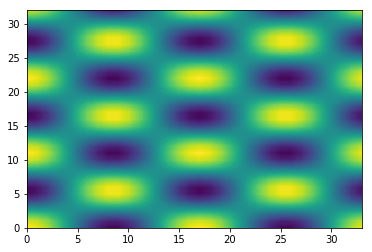

In [6]:
# Plotting
contour_levels = 100
plt.contourf(sliceXY, contour_levels)

# Get a vertical slice at a given x level


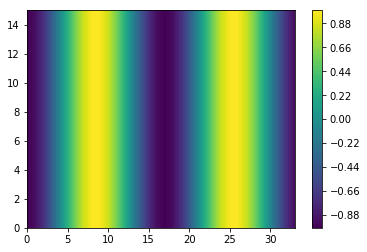

In [12]:
xLevel = np.pi
field = 'temperature'
sliceYZ = cartesian.getVerticalSlice(s,field,'x', xLevel)
plt.contourf(sliceYZ,contour_levels)
plt.colorbar()

# Get a vertical slice at a given y level


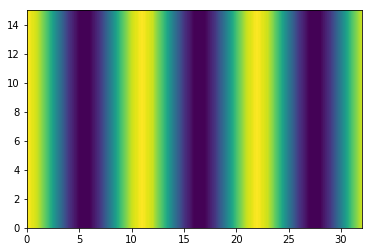

In [8]:
yLevel = 2*np.pi
sliceXZ = cartesian.getVerticalSlice(s,field,'y',yLevel)
plt.contourf(sliceXZ,contour_levels)

# Get a value at a specific point

In [9]:
field = 'temperature'
xValue = 0
yValue = 1
zValue = .5
value = cartesian.getPointValue(s, field, xValue, yValue, zValue)
print(value)

-0.41614683654714246


# Make the Fourier and Chebyshev grids

In [10]:
zRes = 10
Z = cartesian.makeChebyshevGrid(zRes)
yRes = 10
Y  = np.linspace(0,2*np.pi, yRes)
xRes = 10
X  = np.linspace(0,2*np.pi, xRes)